In [1]:
from IPython.display import Image

# 문제 설명

* rows x columns 크기인 행렬이 있습니다. 행렬에는 1부터 rows x columns까지의 숫자가 한 줄씩 순서대로 적혀있습니다. 이 행렬에서 직사각형 모양의 범위를 여러 번 선택해, 테두리 부분에 있는 숫자들을 시계방향으로 회전시키려 합니다. 각 회전은 (x1, y1, x2, y2)인 정수 4개로 표현하며, 그 의미는 다음과 같습니다.

* x1 행 y1 열부터 x2 행 y2 열까지의 영역에 해당하는 직사각형에서 테두리에 있는 숫자들을 한 칸씩 시계방향으로 회전합니다.

* 다음은 6 x 6 크기 행렬의 예시입니다.

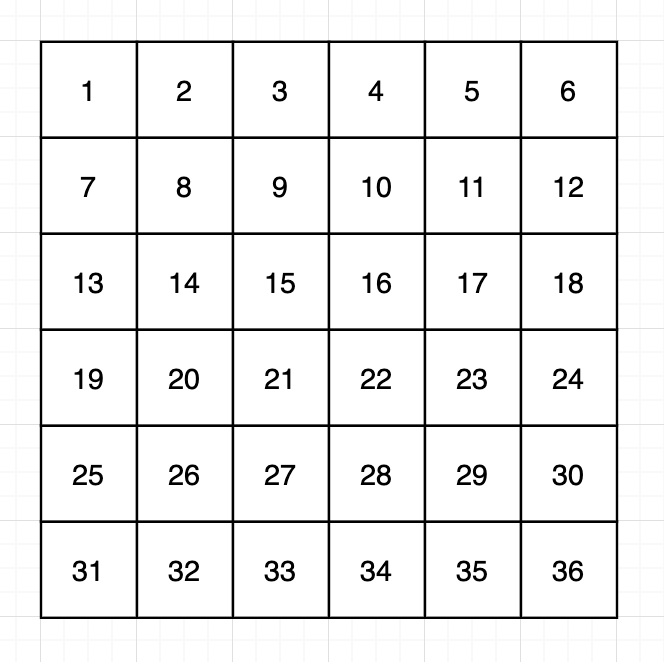

In [2]:
Image('../../../../image/행렬 테두리 회전하기1.png', width = 500)

* 이 행렬에 (2, 2, 5, 4) 회전을 적용하면, 아래 그림과 같이 2행 2열부터 5행 4열까지 영역의 테두리가 시계방향으로 회전합니다. 이때, 중앙의 15와 21이 있는 영역은 회전하지 않는 것을 주의하세요.

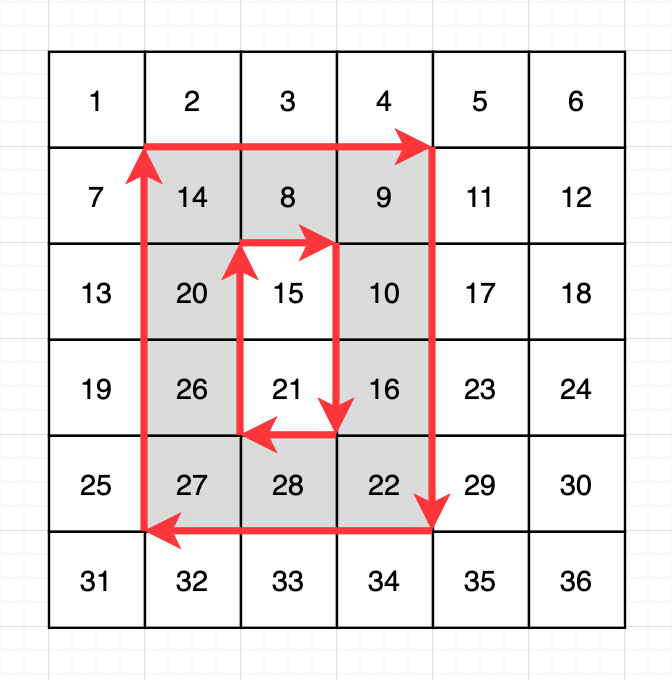

In [3]:
Image('../../../../image/행렬 테두리 회전하기2.png', width = 500)

* 행렬의 세로 길이(행 개수) rows, 가로 길이(열 개수) columns, 그리고 회전들의 목록 queries가 주어질 때, 각 회전들을 배열에 적용한 뒤, 그 회전에 의해 위치가 바뀐 숫자들 중 가장 작은 숫자들을 순서대로 배열에 담아 return 하도록 solution 함수를 완성해주세요.

# 제한사항

* rows는 2 이상 100 이하인 자연수입니다.
* columns는 2 이상 100 이하인 자연수입니다.
* 처음에 행렬에는 가로 방향으로 숫자가 1부터 하나씩 증가하면서 적혀있습니다.
    * 즉, 아무 회전도 하지 않았을 때, i 행 j 열에 있는 숫자는 ((i-1) x columns + j)입니다.
* queries의 행의 개수(회전의 개수)는 1 이상 10,000 이하입니다.
* queries의 각 행은 4개의 정수 [x1, y1, x2, y2]입니다.
    * x1 행 y1 열부터 x2 행 y2 열까지 영역의 테두리를 시계방향으로 회전한다는 뜻입니다.
    * 1 ≤ x1 < x2 ≤ rows, 1 ≤ y1 < y2 ≤ columns입니다.
    * 모든 회전은 순서대로 이루어집니다.
    * 예를 들어, 두 번째 회전에 대한 답은 첫 번째 회전을 실행한 다음, 그 상태에서 두 번째 회전을 실행했을 때 이동한 숫자 중 최솟값을 구하면 됩니다.

# 예제 입출력

|rows|columns|queries|result|
|---|---|---|---|
|6|6|[[2,2,5,4],[3,3,6,6],[5,1,6,3]]|[8, 10, 25]|
|3|3|[[1,1,2,2],[1,2,2,3],[2,1,3,2],[2,2,3,3]]|[1, 1, 5, 3]|
|100|97|[[1,1,100,97]]|[1]|

In [4]:
def solution(rows, columns, queries):
    answer = []
    matrix = []
    
    row_line = []
    for i in range(1, rows*columns+1):
        row_line.append(i)
        if len(row_line) == columns:
            matrix.append(row_line)
            row_line = []
            
    for query in queries:
        y1, x1, y2, x2 = query
        temp = matrix[y1-1][x1-1]
        min_num = temp
        
        for i in range(y1, y2):
            new_num = matrix[i][x1-1]
            matrix[i-1][x1-1] = new_num
            min_num = min(min_num, new_num)
        
        for i in range(x1, x2):
            new_num = matrix[y2-1][i]
            matrix[y2-1][i-1] = new_num
            min_num = min(min_num, new_num)
            
        for i in range(y2, y1, -1):
            new_num = matrix[i-2][x2-1]
            matrix[i-1][x2-1] = new_num
            min_num = min(min_num, new_num)
            
        for i in range(x2, x1, -1):
            new_num = matrix[y1-1][i-2]
            matrix[y1-1][i-1] = new_num
            min_num = min(min_num, new_num)
            
        matrix[y1-1][x1] = temp
        answer.append(min_num)
    return answer

In [5]:
for rows, columns, queries in [[6, 6, [[2,2,5,4],[3,3,6,6],[5,1,6,3]]], [3, 3, [[1,1,2,2],[1,2,2,3],[2,1,3,2],[2,2,3,3]]], [100, 97, [[1,1,100,97]]]]:
    print(solution(rows, columns, queries))

[8, 10, 25]
[1, 1, 5, 3]
[1]


# 풀이 과정 및 주의사항

 * 1부터 row * columns 숫자 값까지 for 반복문을 통해 row_line List에 순서대로 숫자를 담고, columns 개수만큼 차면 matrix에 추가한다. 그리고 row_line을 초기화시키는 과정을 반복하여 matrix 행렬을 만든다. 
 * 반 시계방향 순서대로 for문을 사용하여 상, 좌, 하, 우의 순서대로 숫자의 위치를 이동시킨다.
 * 이 과정에서 맨 처음 이동하는 숫자는 사라지게 되므로 미리 저장을 하고 회전이 끝난 후 시작지점의 우측칸에 위치하도록 한다.
 * 미리 저장을 한 숫자와, 행렬을 이동시키면서 지정되는 숫자를 비교해서 마지막에 가장 낮은 숫자를 answer List에 추가한다. 

https://school.programmers.co.kr/learn/courses/30/lessons/77485